In [ ]:
!kaggle datasets download -d azalhowaide/iot-dataset-for-intrusion-detection-systems-ids --unzip

Dataset URL: https://www.kaggle.com/datasets/azalhowaide/iot-dataset-for-intrusion-detection-systems-ids
License(s): unknown
 99% 519M/525M [00:08<00:00, 71.4MB/s]
100% 525M/525M [00:08<00:00, 65.1MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("BotNeTIoT-L01_label_NoDuplicates.csv")
df.head()

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,0
1,1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,...,7.263102e+08,5.662344e+17,1.93164,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,0
2,2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,0
3,3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0
4,4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,...,7.529571e+08,5.669445e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0


In [ ]:
print(df.shape)

(2426574, 25)


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426574 entries, 0 to 2426573
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MI_dir_L0.1_weight    float64
 1   MI_dir_L0.1_mean      float64
 2   MI_dir_L0.1_variance  float64
 3   H_L0.1_weight         float64
 4   H_L0.1_mean           float64
 5   H_L0.1_variance       float64
 6   HH_L0.1_weight        float64
 7   HH_L0.1_mean          float64
 8   HH_L0.1_std           float64
 9   HH_L0.1_magnitude     float64
 10  HH_L0.1_radius        float64
 11  HH_L0.1_covariance    float64
 12  HH_L0.1_pcc           float64
 13  HH_jit_L0.1_weight    float64
 14  HH_jit_L0.1_mean      float64
 15  HH_jit_L0.1_variance  float64
 16  HpHp_L0.1_weight      float64
 17  HpHp_L0.1_mean        float64
 18  HpHp_L0.1_std         float64
 19  HpHp_L0.1_magnitude   float64
 20  HpHp_L0.1_radius      float64
 21  HpHp_L0.1_covariance  float64
 22  HpHp_L0.1_pcc         float64
 23  label  

In [ ]:
attack_cat_count = df['label'].value_counts()
labels = attack_cat_count.index
values = attack_cat_count.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="Distribution of Target",
                  legend=dict(
                      x=0.3,  # Adjust x position to move legend closer
                      y=0.5,   # Adjust y position if needed
                      font=dict(
                          family="Arial",
                          size=20,
                          color="black",
                          #bold=True  # Make legend text bold
                      )
                  ))
fig.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Apply SelectKBest with f_classif for numerical data
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Print the names of the selected features
print(X.columns[selected_features])


Index(['MI_dir_L0.1_weight', 'H_L0.1_weight', 'HH_L0.1_weight',
       'HH_jit_L0.1_weight', 'HH_jit_L0.1_mean'],
      dtype='object')


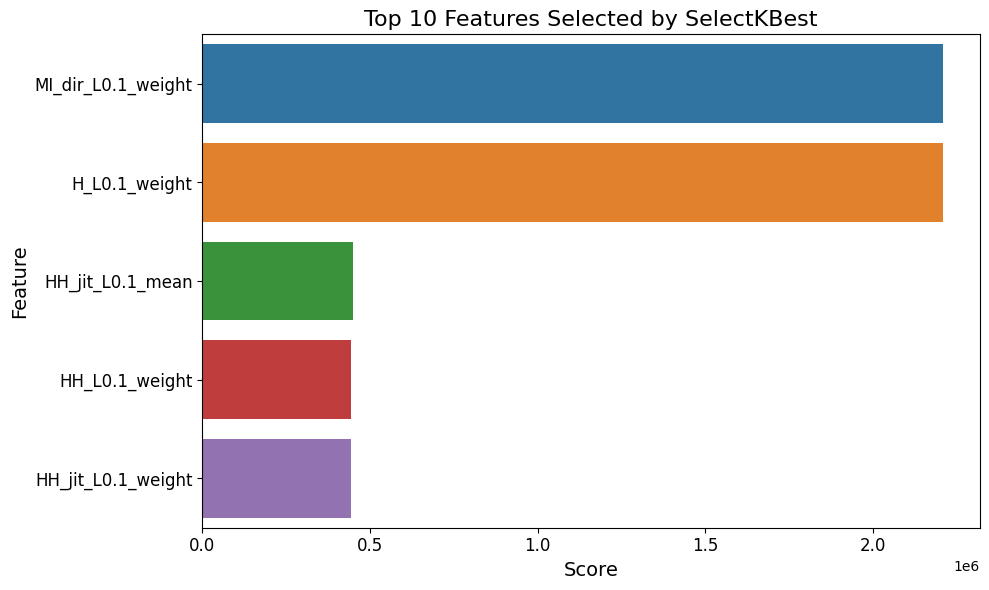

In [ ]:
# prompt: make the beautiful and colorful bar chat of selected features

# Get the names of the selected features
selected_feature_names = X.columns[selected_features]

# Calculate the scores for the selected features
scores = selector.scores_[selected_features]

# Create a DataFrame for plotting
df_scores = pd.DataFrame({'Feature': selected_feature_names, 'Score': scores})

# Sort the DataFrame by scores in descending order
df_scores = df_scores.sort_values('Score', ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=df_scores, palette='tab10')
plt.title('Top 10 Features Selected by SelectKBest', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(X_new, columns=X.columns[selected_features])
df['label'] = y
df.head()

,MI_dir_L0.1_weight,H_L0.1_weight,HH_L0.1_weight,HH_jit_L0.1_weight,HH_jit_L0.1_mean,label
0,1.000000,1.000000,1.00000,1.00000,1.505914e+09,0
1,1.931640,1.931640,1.93164,1.93164,7.263102e+08,0
2,2.904273,2.904273,1.00000,1.00000,1.505914e+09,0
3,3.902546,3.902546,1.00000,1.00000,1.505914e+09,0
4,4.902545,4.902545,2.00000,2.00000,7.529571e+08,0
